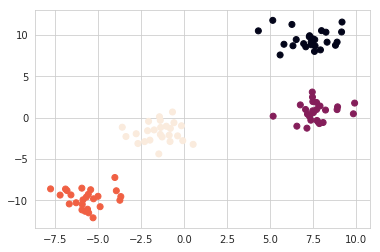

interactive(children=(IntSlider(value=0, description='elev', max=90, min=-90), IntSlider(value=0, description=…

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import LinearSVC
from ipywidgets import interact, fixed
from mpl_toolkits import mplot3d

X, y = make_blobs(centers=4, random_state=8)
plt.scatter(X[:, 0], X[:, 1], c=y)

def plot_decision_function(model):
    ax = plt.gca(projection='3d')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(xlim[0], ylim[1], 30)
    X, Y = np.meshgrid(x, y)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    P = (coef[0] * X + coef[1] * Y + intercept) / coef[2]
    ax.plot_surface(X, Y, P)
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
def plot_3D(elev=0, azim=0, X=X, y=y):
    y = y % 2
    X = np.hstack([X, X[:, 1:] ** 2])
    model = LinearSVC()
    model.fit(X, y)
    coef = model.coef_.ravel()
    intercept = model.intercept_
    
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111, projection='3d')
    xlim = [X[:, 0].min(), X[:, 0].max()]
    ylim = [X[:, 1].min(), X[:, 1].max()]
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    XX, YY = np.meshgrid(xx, yy)
    ZZ = YY ** 2
    xyz = np.vstack([XX.ravel(), YY.ravel(), ZZ.ravel()]).T
    dec = model.decision_function(xyz)
    dec = dec.reshape(XX.shape)
    plt.contourf(XX, YY, dec)
    P = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
    ax.plot_surface(XX, YY, P)
    
    mask = y == 0
    ax.scatter3D(X[mask, 0], X[mask, 1], X[mask, 2], 
                 c='b', s=50, cmap='autumn')
    ax.scatter3D(X[~mask, 0], X[~mask, 1], X[~mask, 2], 
                 c='r', s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

interact(plot_3D, elev=(-90, 90), azim=(-180, 180), X=fixed(X), y=fixed(y));